# 2.1　人工ニューロンー機械学習の前史
- 問題を二値分類タスクとして捉える
- 活性化関数$\phi(z)$を定義できる。$z$は総入力である。
- この関数は、特定の入力値$\vec{x}$と対応する重みベクトル$\vec{w}$の線形結合を因数として受け取る
$$\vec{w} = \left( \begin{array}{cc} w_{1}\\ \vdots \\ w_{m}\\ \end{array} \right), \vec{x} = \left( \begin{array}{cc} x_{1}\\ \vdots \\ x_{m}\\ \end{array} \right)$$

$$ \phi(z) = \left\{ \begin{array}{l} 1 ~~~~~ (z \geq \theta) \\ -1 ~~~ (z < \theta) \end{array} \right. $$

- 閾値$\theta$を左辺に移動するために、インデックス0の重みを$w_{0}=-\theta$及び$x_{0}=1$として定義する。

$$z = w_{0}x_{0}+w_{1}x_{1}+\vdots+w_{m}x_{m} = \vec{w}^{T}\vec{x} ~~ and ~~ \phi(z) = \left\{ \begin{array}{l} 1 ~~~~~ (z \geq 0) \\ -1 ~~~ (z < 0) \end{array} \right.$$

- パーセプトロンの初期の学習規則はきわめて単純で以下の手順

1.重みを0または値の小さい乱数で初期化する

2.トレーニングサンプル$\vec{x}^{(i)}$ごとに以下の手順を実行する。

①出力値$\hat{y}$を計算する

②重みを更新する

- $\eta$は学習率（0より大きく、1より小さい）
- 重み$w_{j}$がすべて更新されるまでは$\hat{y}^{(i)}$は再計算されない
$$w_{j} := w_{j}+\Delta w_{j}$$
$$\Delta w_{j} = \eta (y^{(i)} - \hat{y}^{(i)})x_{j}^{(i)}$$

### ※以下手書き計算で確認してください。
予測が間違っていた場合で、かつ$x^{(i)}_{j}>0$の場合、予測が+1だった場合は重みは減少する方向に更新される。予測が-1の場合は重みが増加する方向に更新される。

- パーセプトロンの収束が保証されるのは、２つのクラスが線形分離可能で、学習率が十分に小さい場合に限られる。

# 2.2 パーセプトロンの学習アルゴリズムをpythonで実装する。
- Irisデータセットに適用してみる

In [1]:
import numpy as np

class Perceptron(object):
    """パーセプトロン分類器
    
    パラメータ
    ------------
    eta:float
        学習率（0.0> & <1.0）
    n_iter:int
        トレーニングデータのトレーニング回数
    
    属性
    ------------
    w_：１次元配列
        適合後の重みベクトル
    errors_：リスト
        各エポックでの誤分類数
    """

    def __init__(self,eta=0.01,n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self,X,y):
        """トレーニングデータに適合させる
        
        パラメータ
        ---------------
        X：{配列のようなデータ構造},shape = {n_samples,n_features}
            トレーニングデータ(説明変数)
            n_samplesはサンプルの個数,n_featuresは特徴量の個数
        y：配列のようなデータ構造,shape = [n_samples]
            目的変数
        
        戻り値
        ---------------
        self：object
        
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter): #トレーニング回数分トレーニングデータを反復
            errors = 0
            for xi,target in zip(X,y):
                #重み wベクトルの更新（w0以外）
                # ⊿wj = η(y(i)-y_predict(i)) * xj(i) jは特徴量の数,iはデータの数に対応
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi #w0はここでは更新しない
                #重みw0の更新：⊿w0=η(y(i)-y_predict(i)) 
                self.w_[0] += update
                # 重みの更新がゼロでない場合は誤分類としてカウント
                errors += int(update != 0.0)
            # 反復回数毎の誤差を格納
            self.errors_.append(errors)
        return self
    
    def net_input(self,X):
        """総出力を計算"""
        return np.dot(X,self.w_[1:]) + self.w_[0] #outputはn_sample×1
    
    def predict(self,X):
        """1ステップ後のクラスラベルを返す"""
        return np.where(self.net_input(X) >= 0.0 ,1 ,-1)

# 2.3 Irisデータセットでのパーセプトロンモデルのトレーニング
- がく辺の長さと花びらの長さの２つの特徴量のみを対象とする。
- 二次元のデータセットの決定境界を可視化する。

In [2]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


/home/kyohei/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


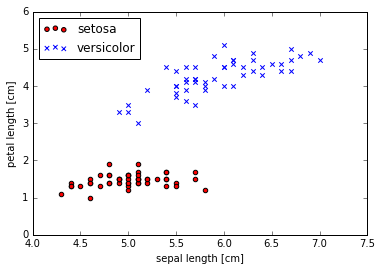

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
#1-100行目の目的変数の抽出
y = df.iloc[0:100,4].values

#Iris-setosaを-1,Irsi-virginicaを1に変換
y = np.where(y == 'Iris-setosa',-1,1)

#説明変数の抽出
X = df.iloc[:100,[0,2]].values

plt.scatter(X[:50,0],X[:50,1],c='r',marker='o',label='setosa')
plt.scatter(X[50:,0],X[50:,1],c='b',marker='x',label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()

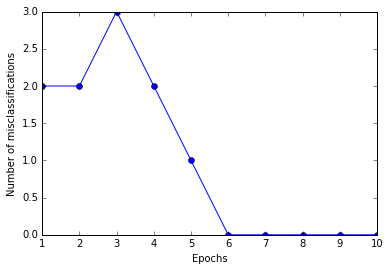

In [4]:
#パーセプトロンオブジェクトの作成（インスタンス化）
ppn = Perceptron(eta=0.1,n_iter=10)
# トレーニングデータへのモデルの適合
ppn.fit(X,y)
#エポックと誤分類誤差の関係の折れ線グラフをプロット
plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [5]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y,classifier,resolution=0.02):
    
    #マーカーとカラーマップの準備
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #決定領域のプロット
    x1_min ,x1_max = X[:,0].min() - 1,X[:,0].max() + 1
    x2_min ,x2_max = X[:,1].min() - 1,X[:,1].max() + 1
    #グリッドポイントの生成
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                          np.arange(x2_min,x2_max,resolution))
    #各特徴量を１次元配列に変換して予測を実行
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    #予測結果を元のグリッドポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    #　グリッドポイントの等高線のプロット
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmap=cmap)
    #軸の範囲の設定
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    #クラスごとにサンプルをプロット
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl,0],y=X[y == cl,1],alpha=0.8,c=cmap(idx),marker=markers[idx],label=cl)
        

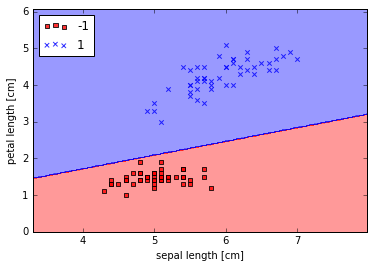

In [6]:
#決定境界のプロット
plot_decision_regions(X,y,classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()